In [ ]:
# Import required libraries

# Core
import pandas as pd
import numpy as np
import joblib
import warnings
import string
import os
import re

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# NLP and ML
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    roc_auc_score
)

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

In [22]:
import pandas as pd

# Load dataset
df = pd.read_csv("D:/VerifAIV5/data/AI_Human.csv")
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (487235, 2)


,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


In [24]:
# Text preprocessing

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s.,!?']", ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply text cleaning
df["text"] = df["text"].apply(clean_text)
df[["text", "generated"]].head()

,text,generated
0,cars. cars have been around since they became ...,0.0
1,transportation is a large necessity in most co...,0.0
2,america's love affair with it's vehicles seems...,0.0
3,how often do you ride in a car? do you drive a...,0.0
4,cars are a wonderful thing. they are perhaps o...,0.0


In [26]:
# Split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(
    df["text"], df["generated"],
    test_size=0.2,
    random_state=42
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))

Train size: 389788
Test size: 97447


In [27]:
# Define and train Random Forest
model_rf = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", RandomForestClassifier(random_state=42))
])
model_rf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(random_state=42))])

In [28]:
# Evaluate
print(f"\nTrain Accuracy: {model_rf.score(X_train, y_train):.2f}")
print(f"Test Accuracy: {model_rf.score(X_test, y_test):.2f}")


Train Accuracy: 1.00
Test Accuracy: 1.00


In [ ]:
# Predict on new samples
new_texts = [
    "Artificial intelligence is transforming the way we interact with technology, enabling machines to perform tasks that once required human intelligence. From personalized recommendations on streaming platforms to advanced medical diagnostics, AI systems are becoming increasingly integrated into everyday life. These technologies learn from vast amounts of data, adapt over time, and improve their performance with continued use. As AI continues to evolve, it holds the potential to revolutionize industries, enhance productivity, and solve complex global challenges—while also raising important ethical questions about privacy, bias, and human oversight.",
    "Eating fruits and vegetables is essential for good health."
]

predictions = model_rf.predict(new_texts)
for text, label in zip(new_texts, predictions):
    print("\nText:", text)
    print("Predicted Label:", label)


Text: In addition to technical limitations, the use of AI surveillance in order to monitor a person’s productivity raises certain ethical concerns. The never-ending monitoring through computer vision can result in a more stressful workplace environment, where discomfort such as performance anxiety, depression, and mental fatigue starts to emerge. Furthermore, the constant surveillance also raises major privacy issues, especially when the employees are not fully aware and unable to give consent. This type of environment will not only cost more, but it may also lead to a decline in employees productivity by dehumanizing employees as tools.
Predicted Label: 1.0

Text: Not to mention models such as YOLOv11, heavily relies on the quality and diversity of the datasets used on training. This means that major bias can occur whenever the data is not equally represented on all various demographic groups. Underrepresented groups across various genders and races, may be misclassified more often, 

In [31]:
# Create the 'model' folder if it doesn't exist
os.makedirs("model", exist_ok=True)

# Save the model
joblib.dump(model_rf, "model/trained2.joblib")

print("Model saved successfully to: model/trained2.joblib")

Model saved successfully to: model/trained1.joblib


In [ ]:
# Reload the saved model
loaded_model = joblib.load("model/trained1.joblib")

# Predict on a new sample
sample = ["Your mind needs rest just like your body."]
print("Prediction:", loaded_model.predict(sample)[0])

Prediction: 1


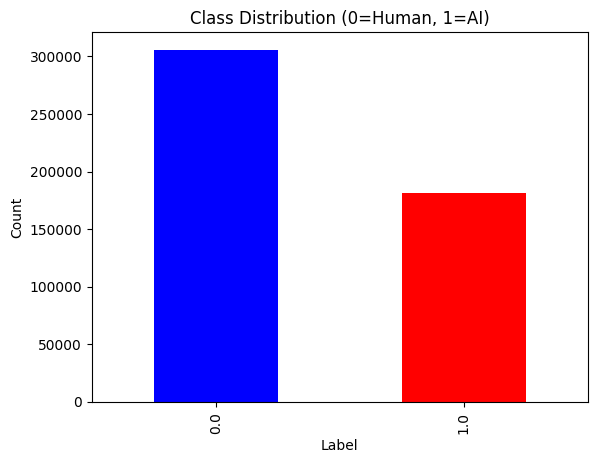

In [34]:
# Visualize class distribution
df["generated"].value_counts().plot(kind='bar', color=["blue", "red"])
plt.title("Class Distribution (0=Human, 1=AI)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

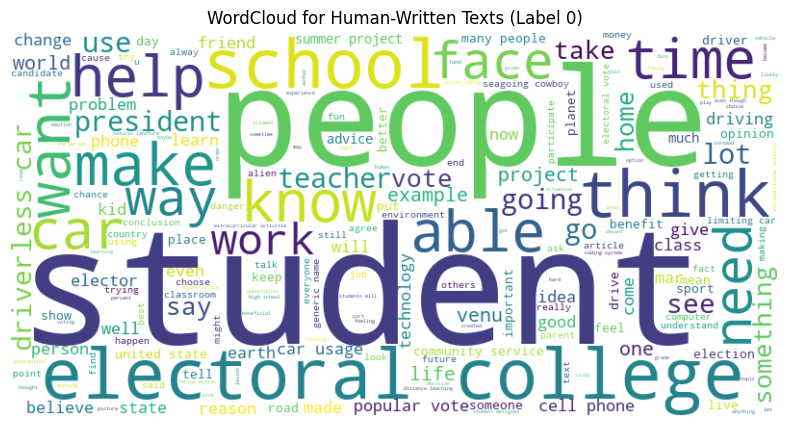

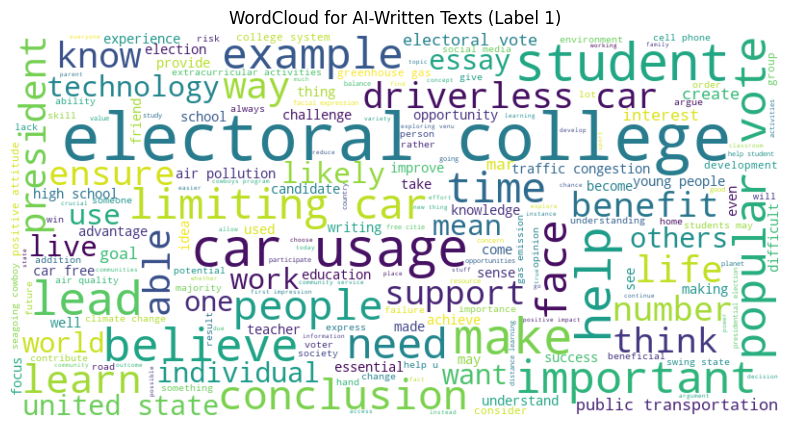

In [30]:
# WordCloud for Human-written text
text_class_0 = " ".join(df[df["generated"] == 0]["text"])
wordcloud_0 = WordCloud(width=800, height=400, background_color="white").generate(text_class_0)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_0, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud for Human-Written Texts (Label 0)")
plt.show()

# WordCloud for AI-generated text
text_class_1 = " ".join(df[df["generated"] == 1]["text"])
wordcloud_1 = WordCloud(width=800, height=400, background_color="white").generate(text_class_1)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_1, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud for AI-Written Texts (Label 1)")
plt.show()

In [32]:
import joblib
joblib.dump(model_rf, 'model2.pkl')

['model2.pkl']